Bookbuild Task
----------

Given a list of LOANS, and a list of INVESTORS, the task is produce an output showing which INVESTORS can be assigned to which LOANS, to fill all loans. 



Let's start with importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Before we continue, let's do some visualizations.

We put the values of loans and invests in a row, or more technically, we look at their cumulative sum.

In the plots below, the distance between two black seperators indicate the amounts of loans, and the distance between two blue dots, indicates the amount of invests.

In [2]:
def visualization(loans, investors):
    
    loan_CS=np.cumsum(loans)
    inv_CS=np.cumsum(investors)
    plt.ylim([-1,1])
    plt.vlines(0,-.8,.8,'gray')
    plt.hlines(0,-inv_CS[1],1.1*max(loan_CS[-1],inv_CS[-1]),'gray')
    plt.vlines(loan_CS,-.1,.1)
    plt.scatter(inv_CS,np.zeros(len(inv_CS)))

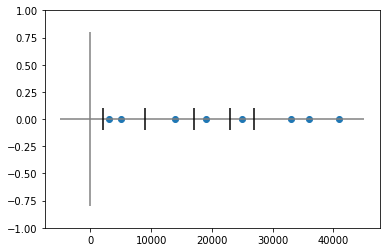

In [3]:
visualization([2000, 7000, 8000, 6000, 4000],[3000, 2000, 9000, 5000, 6000, 8000, 3000, 5000])

As you can see in the plot above, the first borrower (black) can recieve his whole money from the first investor (blue), but for the second borrower, he has to wait till the third investor to be able to recieve his loan. Continuing the same argument, borrowers may follow the following instruction to recieve their money:

[[0], [0, 1, 2], [2, 3], [3, 4], [4, 5]]

So, all we have to do is to implement the function:

This function tells you which borrower should borrow money from which investor:

In [4]:
def bookbuild(loans, investors):
    
    # Cumulative sum of both
    loan_CS=np.cumsum(loans)
    inv_CS=np.cumsum(investors)
    
    # The first loaner always starts at zero
    starts=[0]
    ends=[]
    

    for l in loan_CS:
    
        # Each borrower is done as soon as investors cumsum reachs the current loans cumsum
        ends.append(list(inv_CS>=l).index(True))
    
        # Next borrower will start as soon as investors cumsum exceed the current loans cumsum
        starts.append(list(inv_CS>l).index(True))
    
    
    # The last entity is useless
    _=starts.pop()

    # Generating results
    results=[]
    for i in range(len(loan_CS)):
        results.append(list(range(starts[i],ends[i]+1)))
        
    return(results)

As an example:

In [5]:
bookbuild([2000, 7000, 8000, 6000, 4000],[3000, 2000, 9000, 5000, 6000, 8000, 3000, 5000])

[[0], [0, 1, 2], [2, 3], [3, 4], [4, 5]]

Also, we may think of the reverse function, i.e, indicating the corresponding loaners for each investor.

In [6]:
def inverse_bookbuild(loans,investors):
    
    # Cumulative sum of both
    loan_CS=np.cumsum(loans)
    inv_CS=np.cumsum(investors)
    
    # The first investor always starts at zero
    starts=[0]
    ends=[]
    
    
    for i in inv_CS:
        for j,l in enumerate(loan_CS):
            
            # Each investor who is not run of money can partially support j+1 where j is the index of the last fully supported borrower
            if l<i:
                end_temp=j+1
            
            # The next investor will start on j+1 where j is the index of the last fully supported borrower
            if l<=i:
                start_temp=j+1
            
        starts.append(start_temp)
        ends.append(end_temp)
        
   # The last entity is useless
    _=starts.pop()

    # Generating results
    results=[]
    for i in range(len(inv_CS)):
        if starts[i]<len(loan_CS)-1:
            results.append(list(range(starts[i],ends[i]+1)))
        else:
            results.append('No Need')
    return(results)

As an example:

In [7]:
inverse_bookbuild([2000, 7000, 8000, 6000, 4000],[3000, 2000, 9000, 5000, 6000, 8000, 3000, 5000])

[[0, 1], [1], [1, 2], [2, 3], [3, 4], 'No Need', 'No Need', 'No Need']